In [1]:
import pickle
import soundfile as sf
import IPython.display as ipd

import torch
import torch.nn as nn
import torch.optim as optim

from models.model_1 import Model_1
from magnitude_loss import MagnitudeLoss
from models.sub_pix import UNetWithSubpixel
from models.patch_gan_discriminator import PatchGANDiscriminator

from constants import *
from train_cgan import train_cgan
from dataset import build_data_loaders
from disk_utils import save_model, load_model
from predict import predict_polar, get_phases, make_wav
from plotter import plot_gan_loss, plot_heatmaps, plot_waves

In [2]:
USE_GPU = True
device = torch.device("cuda" if torch.cuda.is_available() and USE_GPU
                      else "cpu")

In [3]:
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

part = "db"
mini = min_max["ney"]["min"][part]
maxi = min_max["ney"]["max"][part]

test_size = 0.05
train_data_loader, test_data_loader = build_data_loaders(
    min_max, part=part, test_size=test_size)

In [4]:
generator = UNetWithSubpixel(features=32).to(device)
discriminator = PatchGANDiscriminator(in_channels=2).to(device)

adversarial_loss = nn.BCELoss()
# l1_loss = nn.L1Loss()
l1_loss = MagnitudeLoss(mini, maxi)

lr = 2e-4
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

In [5]:
num_epochs = 50
generator, history = train_cgan(device, train_data_loader, generator,
                                discriminator, adversarial_loss, l1_loss,
                                optimizer_G, optimizer_D, num_epochs, 1.0)

 - B: 100	 D: 0.090924	 G: 122.279572
 - B: 200	 D: 0.011371	 G: 80.589195
 - B: 300	 D: 0.054565	 G: 51.076626
 - B: 400	 D: 0.013529	 G: 57.746403
 - B: 500	 D: 0.043280	 G: 59.149139
 - B: 600	 D: 0.053910	 G: 58.134258
 - B: 700	 D: 0.008712	 G: 45.687038
 - B: 800	 D: 0.006540	 G: 42.686462
E: 001/50	 D: 0.091494	 G: 74.151133
 - B: 100	 D: 0.013119	 G: 43.087784
 - B: 200	 D: 0.001087	 G: 43.950768
 - B: 300	 D: 0.002312	 G: 42.643299
 - B: 400	 D: 0.003206	 G: 43.123936
 - B: 500	 D: 0.033573	 G: 44.287930
 - B: 600	 D: 0.000580	 G: 39.449116
 - B: 700	 D: 0.003692	 G: 46.257107
 - B: 800	 D: 0.000650	 G: 44.617851
E: 002/50	 D: 0.014899	 G: 44.372989
 - B: 100	 D: 0.002246	 G: 38.882030
 - B: 200	 D: 0.000191	 G: 38.240433
 - B: 300	 D: 0.076531	 G: 38.713760
 - B: 400	 D: 0.104174	 G: 36.822163
 - B: 500	 D: 0.087162	 G: 40.835709
 - B: 600	 D: 0.189954	 G: 41.624302
 - B: 700	 D: 0.045876	 G: 40.480618
 - B: 800	 D: 0.197968	 G: 38.361908
E: 003/50	 D: 0.058334	 G: 40.898943


In [6]:
generator.to(torch.device("cpu"))
discriminator.to(torch.device("cpu"))

PatchGANDiscriminator(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

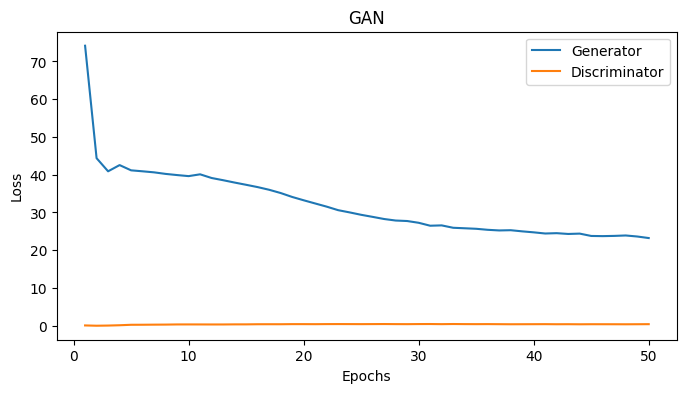

In [7]:
plot_gan_loss(history, "GAN", start=0)

In [ ]:
torch.cuda.empty_cache()
del generator
del discriminator

In [8]:
pred_limit = 32
predictions, targets = predict_polar(
    generator,
    test_data_loader,
    min_max["ney"]["min"][part],
    min_max["ney"]["max"][part],
    limit=pred_limit,
    from_db=(part == "db"))

Gtr_2_15/chunk_0, Gtr_2_15/chunk_1, Gtr_2_15/chunk_2, Gtr_2_15/chunk_3, Gtr_2_15/chunk_4, Gtr_2_15/chunk_5, Gtr_2_15/chunk_6, Gtr_2_15/chunk_7
Ney_2_15/chunk_0, Ney_2_15/chunk_1, Ney_2_15/chunk_2, Ney_2_15/chunk_3, Ney_2_15/chunk_4, Ney_2_15/chunk_5, Ney_2_15/chunk_6, Ney_2_15/chunk_7
--------------------------------------------------
Gtr_2_15/chunk_8, Gtr_2_15/chunk_9, Gtr_2_15/chunk_10, Gtr_2_15/chunk_11, Gtr_2_15/chunk_12, Gtr_2_15/chunk_13, Gtr_2_15/chunk_14, Gtr_2_15/chunk_15
Ney_2_15/chunk_8, Ney_2_15/chunk_9, Ney_2_15/chunk_10, Ney_2_15/chunk_11, Ney_2_15/chunk_12, Ney_2_15/chunk_13, Ney_2_15/chunk_14, Ney_2_15/chunk_15
--------------------------------------------------
Gtr_2_15/chunk_16, Gtr_2_15/chunk_17, Gtr_2_15/chunk_18, Gtr_2_15/chunk_19, Gtr_2_15/chunk_20, Gtr_2_15/chunk_21, Gtr_2_15/chunk_22, Gtr_2_15/chunk_23
Ney_2_15/chunk_16, Ney_2_15/chunk_17, Ney_2_15/chunk_18, Ney_2_15/chunk_19, Ney_2_15/chunk_20, Ney_2_15/chunk_21, Ney_2_15/chunk_22, Ney_2_15/chunk_23
------------

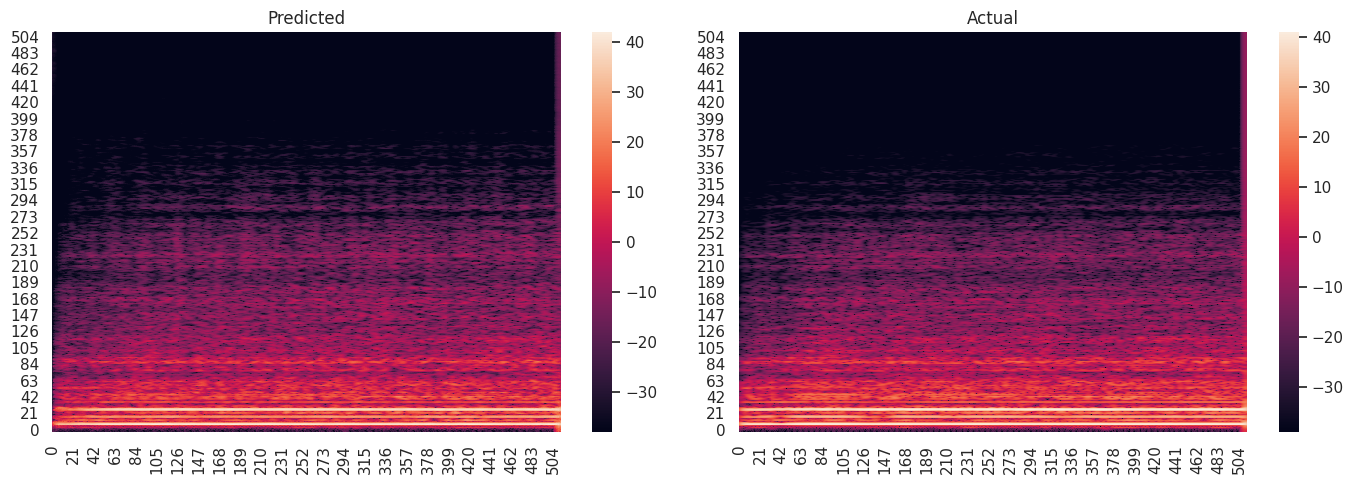

In [9]:
plot_heatmaps(predictions[0], targets[0], from_db=(part == "db"))

In [10]:
_, test_data_loader_phase = build_data_loaders(
    min_max, part="phase", test_size=test_size)
phases = get_phases(test_data_loader_phase,
                    instrument="ney",
                    limit=pred_limit)

Ney_2_15/chunk_0, Ney_2_15/chunk_1, Ney_2_15/chunk_2, Ney_2_15/chunk_3, Ney_2_15/chunk_4, Ney_2_15/chunk_5, Ney_2_15/chunk_6, Ney_2_15/chunk_7
--------------------------------------------------
Ney_2_15/chunk_8, Ney_2_15/chunk_9, Ney_2_15/chunk_10, Ney_2_15/chunk_11, Ney_2_15/chunk_12, Ney_2_15/chunk_13, Ney_2_15/chunk_14, Ney_2_15/chunk_15
--------------------------------------------------
Ney_2_15/chunk_16, Ney_2_15/chunk_17, Ney_2_15/chunk_18, Ney_2_15/chunk_19, Ney_2_15/chunk_20, Ney_2_15/chunk_21, Ney_2_15/chunk_22, Ney_2_15/chunk_23
--------------------------------------------------
Ney_2_15/chunk_24, Ney_2_15/chunk_25, Ney_2_15/chunk_26, Ney_2_15/chunk_27, Ney_2_15/chunk_28, Ney_2_15/chunk_29, Ney_2_15/chunk_30, Ney_2_15/chunk_31
--------------------------------------------------


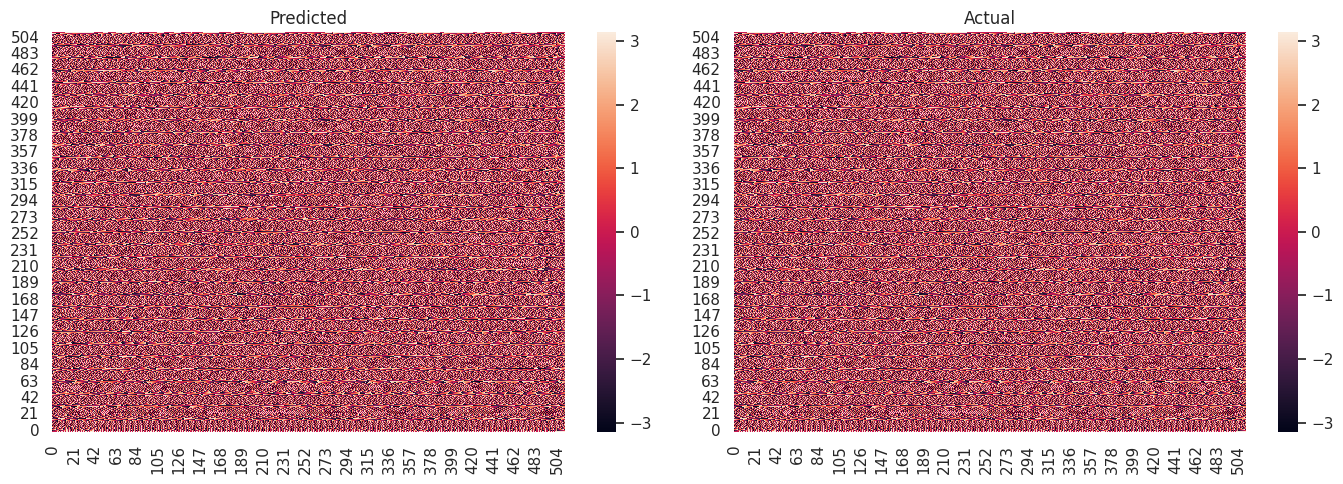

In [11]:
plot_heatmaps(phases[0], phases[0])

64448 64448


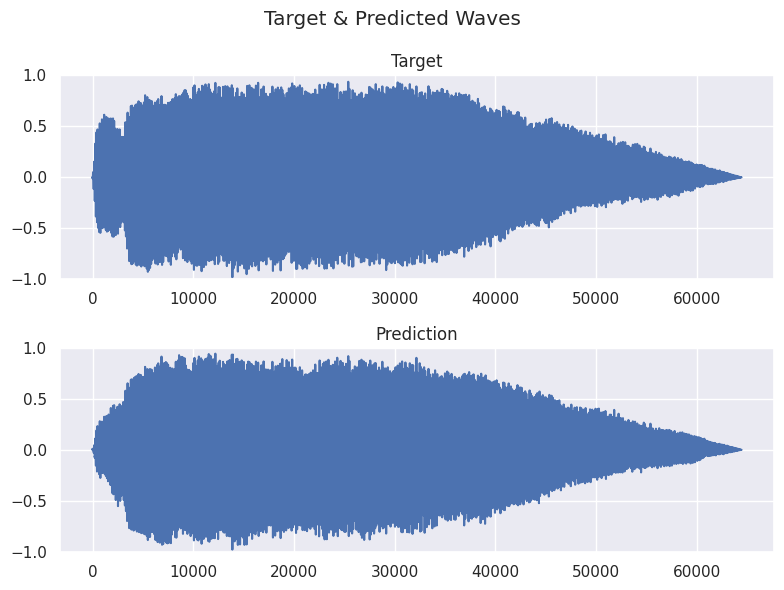

In [12]:
wave_prediction = make_wav(predictions, phases)
wave_target = make_wav(targets, phases)
print(len(wave_prediction), len(wave_target))
plot_waves(wave_target, wave_prediction)

In [ ]:
ipd.Audio(wave_target, rate=SR)

In [ ]:
ipd.Audio(wave_prediction, rate=SR)

In [13]:
sf.write("z_target_gan.wav", wave_target, SR, format="wav")
sf.write("z_prediction_gan.wav", wave_prediction, SR, format="wav")

In [14]:
save_model(generator, "generator_sp_32")
save_model(discriminator, "discriminator_sp_32")